In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy.typing import ArrayLike
sns.set()

## Building histograms

In [18]:
#data
df = pd.read_csv("../../../data/michelson_speed_of_light.csv")

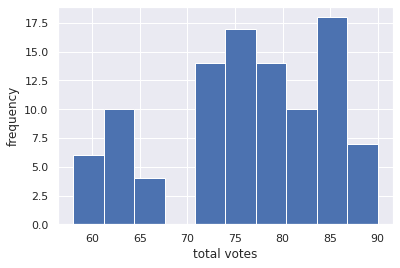

In [20]:
# plotting histogram from total_votes in all states
_ = plt.hist(df["temperature (F)"])
_ = plt.xlabel("temperature values")
_ = plt.ylabel("frequency")
plt.show()

In order to set the number of bins of the plot, there is a commonly-used rule of thumb: "square root rule"

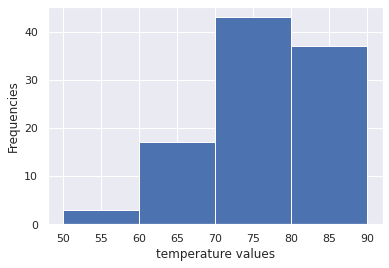

In [27]:
# setting the bins
bins = [50, 60, 70, 80, 90]
_ = plt.hist(df["temperature (F)"], bins=bins)
_ = plt.xlabel("temperature values")
_ = plt.ylabel("Frequencies")
plt.show()

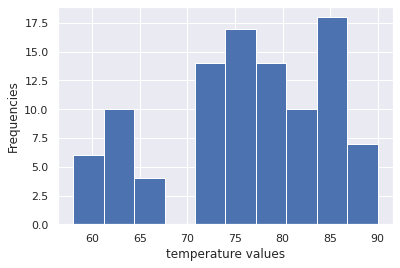

In [29]:
# setting the bins
len_temp_values = len(df["temperature (F)"])
bins = int(np.sqrt(len_temp_values))
_ = plt.hist(df["temperature (F)"], bins=bins)
_ = plt.xlabel("temperature values")
_ = plt.ylabel("Frequencies")
plt.show()

## Making a Swarm plot

In [31]:
# data
df_swing_states = pd.read_csv("../../../data/2008_swing_states.csv")

In [35]:
df_swing_states.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


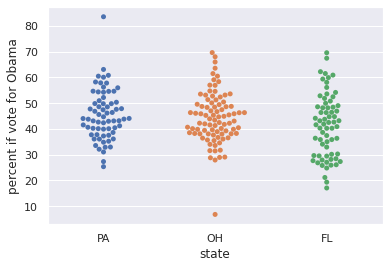

In [39]:
_ = sns.swarmplot(x="state", y="dem_share", data=df_swing_states)
_ = plt.xlabel("state")
_ = plt.ylabel("percent if vote for Obama")
plt.show()

In [42]:
df_all_states = pd.read_csv("../../../data/2008_all_states.csv")
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


/home/luba/.local/share/virtualenvs/Sprints-JXaz6qMw/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/luba/.local/share/virtualenvs/Sprints-JXaz6qMw/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 58.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


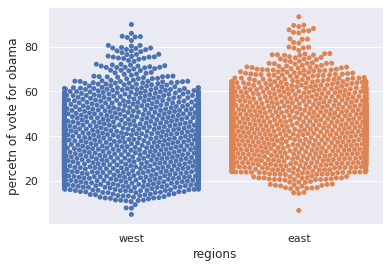

In [44]:
_ = sns.swarmplot(x="east_west", y="dem_share", data=df_all_states)
_ = plt.xlabel("regions")
_ = plt.ylabel("percetn of vote for obama")
plt.show()

Swarmplots doesn't scale well with big data. We can sample our data, and plot the sample, or bring another viz, like ECDFs (Empirical cumulative distribution function).

## ECDFs (empirical cumulative distribution function)

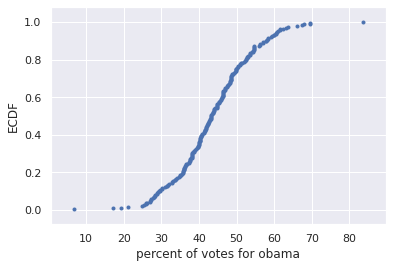

In [49]:
x = np.sort(df_swing_states["dem_share"])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.xlabel("percent of votes for obama")
_ = plt.ylabel("ECDF")
plt.margins(.08)
plt.show()

In [51]:
# creating a ecdf function
def ecdf(data: ArrayLike):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

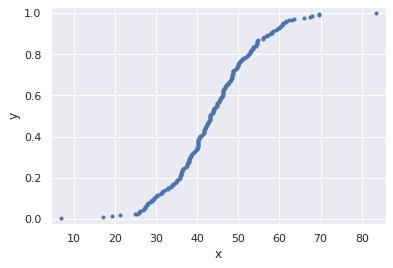

In [54]:
x, y = ecdf(df_swing_states["dem_share"])
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.xlabel("x")
_ = plt.ylabel("y")
plt.margins(0.03)
plt.show()



To compare distributions is a good idea to plot ecdfs plots on top of each other. And, for that, we need to run our function different times for each one of the variables.


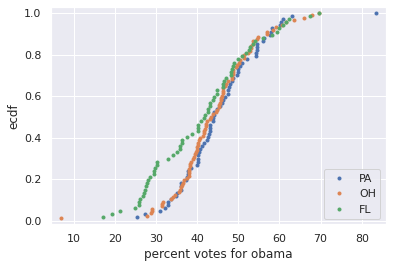

In [58]:
x_pa, y_pa = ecdf(df_swing_states[df_swing_states["state"] == "PA"]["dem_share"])
x_oh, y_oh = ecdf(df_swing_states[df_swing_states["state"] == "OH"]["dem_share"])
x_fl, y_fl = ecdf(df_swing_states[df_swing_states["state"] == "FL"]["dem_share"])

_ = plt.plot(x_pa, y_pa, marker=".", linestyle="none")
_ = plt.plot(x_oh, y_oh, marker=".", linestyle="none")
_ = plt.plot(x_fl, y_fl, marker=".", linestyle="none")
_ = plt.xlabel("percent votes for obama")
_ = plt.ylabel("ecdf")

plt.legend(["PA", "OH", "FL"], loc="lower right")
plt.margins(0.03)
plt.show()

In [56]:
df_swing_states["state"].value_counts()

OH    88
PA    67
FL    67
Name: state, dtype: int64